In [2]:
import numpy as np 
from rnn import *
import matplotlib.pyplot as plt

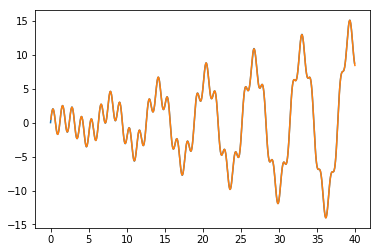

In [33]:


'''
Train on the sequence (xsin(x)/3+2sin(5x)) (from 0 to 40)
400 points
seq_length = 32
'''

def fetch_batch(batch_size, seq_length, X):
	random_ix = np.random.permutation(len(X)-seq_length)
	X_batch = []
	y_batch = []
	for i in random_ix[:batch_size]:
		X_batch.append(np.asarray(X[i:i+seq_length].reshape(-1,1)))
		y_batch.append(X[i+1:i+1+seq_length].reshape(-1,1))
	X_batch, y_batch = np.asarray(X_batch), np.asarray(y_batch)
	X_batch, y_batch = np.transpose(X_batch,(1,0,2)), np.transpose(y_batch,(1,0,2))
	return X_batch, y_batch
train_size = 400
X_train = np.array([((i/10.)*np.sin(i/10.)/3+2*np.sin(5*(i/10.))) for i in range(train_size)])
X_test = np.array([(((i+0.5)/10.)*np.sin((i+0.5)/10.)/3 + 2*np.sin(5*((i+0.5)/10.))) for i in range(train_size)])
plt.plot([i/10. for i in range(train_size)],X_train)
plt.plot([(i+0.5)/10. for i in range(train_size)],X_test)
plt.show()


In [49]:
seq_length = 20
n_units = 100
learning_rate = 0.001
batch_size = 50

network = rnn(n_units=n_units, X_length=1, y_length=1)
# train
for i in range(10000):
#     learning_rate*=0.99
    X_batch, y_batch = fetch_batch(batch_size, seq_length, X_train)
    X_test_batch, y_test_batch = fetch_batch(batch_size, seq_length, X_test)
    if i%100==0:
        print("train loss: {}".format(network.loss(X_batch,y_batch)))
        print("test loss : {}".format(network.loss(X_test_batch, y_test_batch)))
    network.fit(X_batch, y_batch, learning_rate)

train loss: 264.730252210107
test loss : 339.469125889758
train loss: 6.775805257512282
test loss : 6.652433210751828
train loss: 5.98618462549186
test loss : 5.846637456686786
train loss: 5.345110069694406
test loss : 5.651159354854988
train loss: 4.495059540840268
test loss : 4.836710451708547
train loss: 5.007663295109641
test loss : 5.129176226012371
train loss: 4.9529909906321885
test loss : 4.580693737805332
train loss: 3.9925517964781614
test loss : 3.961665904523583
train loss: 3.067873029670328
test loss : 3.2612488112129516
train loss: 2.369092488959928
test loss : 2.252272943254503
train loss: 1.6627723340230534
test loss : 1.6418039631005068
train loss: 1.4335761820260393
test loss : 1.619219303098864
train loss: 1.4169342171377324
test loss : 1.3260668358075396
train loss: 1.6884189410589323
test loss : 1.4409230155418737
train loss: 1.1481607465974544
test loss : 1.2043784058773244
train loss: 1.16566556798827
test loss : 1.4584028458765819
train loss: 0.979057655212317
t

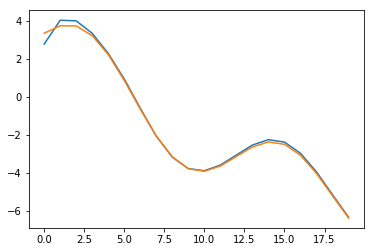

In [56]:
# generate
gen_size = 100
starting_point = 150
seq = X_test[starting_point:starting_point+seq_length].tolist()
gen_seq,_ = network.predict(np.asarray(seq).reshape(-1,1,1))
plt.plot(range(seq_length),gen_seq.reshape(-1))
plt.plot(range(seq_length),X_test[starting_point+1:starting_point+1+seq_length])
plt.show()
for i in range(gen_size):
    output_seq, h_seq = network.predict(np.asarray(seq[-seq_length:]).reshape(-1,1,1))
    seq.append(output_seq[-1,0,0])
    

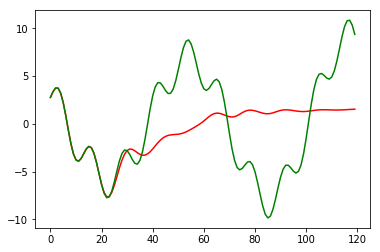

In [57]:
plt.plot(range(len(seq)),seq,'r')
plt.plot(range(len(seq)),X_test[starting_point:starting_point+len(seq)],'g')
plt.show()

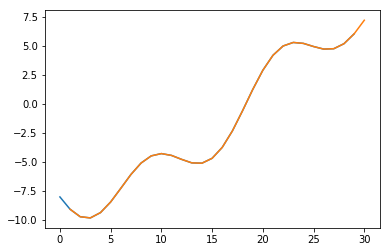

In [53]:
X_batch, y_batch = fetch_batch(5,30,X_train)
X_batch, y_batch = X_batch[:,0,:].reshape(-1), y_batch[:,0,:].reshape(-1)
plt.plot(range(30),X_batch)
plt.plot(range(1,31),y_batch)
plt.show()